# Lab 6 --- RE02, Starting at 19:05

## Sentiment Analysis

**SA == the Detection of Attitudes**

--------------------------------
Basic SA Task = N-to-ONE Task = Classify the Sentiment (e.g., Positive or Negative)

--------------------------------
Examples of application of sentiment analysis in real-life?

*   Divide reviews into different aspect rating (e.g., iPhone13 Review)

*   Predict the stock market using Twitter mood (Bollen et al. 2011)

# Preprocessing

Text preprocessing is an important step for natural language processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better. It is important to understand what each preprocessing method does in order to help decide if it is appropriate for your particular task.

## Text Wrangling

Text wrangling is converting/gathering/extracting formatted text from raw data. 

For example, **HTML** does not include only content text. Even when you extract only the text from **HTML**, it is not all meaningful (e.g. it can include menu items).

Have a look at this [news article](https://www.vox.com/future-perfect/2023/3/25/23655082/ai-openai-gpt-4-safety-microsoft-facebook-meta). We might be only interested in getting the headline and body of the article.

The following code removes some irrelevant tags (i.e. script, style, link, etc.) and displays the remaining tags. We will mainly utilise two packages: 


*   `urllib`: is a package that collects several modules for working with URLs. We will use `urllib.request` for opening and reading URLs (See details at [urllib.request](https://docs.python.org/3/library/urllib.request.html#module-urllib.request)). 
*   `BeautifulSoup`: Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree (See details at [BeautifulSoup](https://pypi.org/project/beautifulsoup4/)).


    


In [19]:
import urllib 
from bs4 import BeautifulSoup

url = "https://www.vox.com/future-perfect/2023/3/25/23655082/ai-openai-gpt-4-safety-microsoft-facebook-meta"
html = urllib.request.urlopen(url).read() ## it will represents the webpage in html language
print(type(html)) # <class 'bytes'>
# print(html[:100])
# # b'\n\n\n\n<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <title>OpenAI\xe2\x80\x99s GPT-4 shows the competitive adva'

soup = BeautifulSoup(html) ## it will represents the document as a nested data structure
print(type(soup)) # <class 'bs4.BeautifulSoup'>

# remove irrelevant tags (script, style, link, etc.)
for script in soup(["script", "style", "link", "head", "noscript"]):
    script.extract()    # rip it out, i.e remove the tag from the tree

# The get_text() returns all the human-readable text beneath the tag as string
text = soup.get_text()
# print(text) # you can uncomment to have a look the returned text

# The prettify() method will turn a Beautiful Soup parse tree into a nicely formatted Unicode string, with a separate line for each tag and each string
# (i.e., there is a parent-children relationship) 
print(soup.prettify())

<class 'bytes'>
<class 'bs4.BeautifulSoup'>
<!DOCTYPE html>
<html lang="en">
 <!--[if lte IE 9]><body class="ie9"><![endif]-->
 <!--[if gte IE 10]><body class="ie"><![endif]-->
 <body class="entry_key_unison_standard entry_layout_unison_main entry_template_standard" data-entry-id="23419123">
  <a class="sr-only link-skip" href="#content">
   Skip to main content
  </a>
  <!-- Google Tag Manager (noscript) -->
  <!-- End Google Tag Manager (noscript) -->
  <svg height="0" style="position:absolute;display:none;" width="0">
   <symbol id="icon-clock" viewbox="90 0 689 645" xmlns="http://www.w3.org/2000/svg">
    <title>
     clock
    </title>
    <path d="M489.1 322.5c0 15-5.4 27.9-16 38.6-10.7 10.7-23.6 16-38.6 16-23.7 0-40.3-10.9-49.9-32.8h-125c-6.4 0-11.6-2.1-15.7-6.1-4-4.1-6.1-9.3-6.1-15.7 0-6.4 2.1-11.6 6.1-15.7 4.1-4.1 9.4-6.1 15.8-6.1h125c5.9-13.2 15.3-22.5 28-28V125.8c0-6.4 2.1-11.6 6.1-15.7 4.1-4.1 9.3-6.1 15.7-6.1 6.4 0 11.6 2 15.7 6.1s6.1 9.3 6.1 15.7v146.8c21.9 9.5 32.9 26.1 

**Try &lt;p&gt;  tag**

Using &lt;p&gt;  tag is a common way to extract the main contents of the online news articles. BUT, do not expect this always provides what you want.

The &lt;p&gt; tag defines a paragraph. Browsers automatically add a single blank line before and after each &lt;p&gt; element.

In [ ]:
# The findAll() method returns all the specified tags, it is the same as find_all()
# Set text=True will return only the specified tags with the text inside, you can try to set text=False to compare the difference
p_tags = soup.findAll('p', text=True) 
for i, p_tag in enumerate(p_tags): 
    print(str(i) + str(p_tag))

0<p class="c-entry-summary p-dek">OpenAI’s GPT-4 shows the competitive advantage of putting in safety work.</p>
1<p>
    Finding the best ways to do good. 
  </p>
2<p id="4BmLyz">Tech companies developing LLMs and other forms of cutting-edge, impactful AI should learn from this comparison. They should adopt the best practice as shown by OpenAI: Invest in safety research and testing before releasing.</p>
3<p id="wtEP4x">First, prune your dataset for toxic or inappropriate content. Second, train your system with reinforcement learning from human feedback (RLHF) and rule-based reward models (RBRMs). RLHF involves human labelers creating demonstration data for the model to copy and ranking data (“output A is preferred to output B”) for the model to better predict what outputs we want. RLHF produces a model that is sometimes overcautious, refusing to answer or hedging (as some users of ChatGPT will have noticed). </p>
4<p id="V4ycqn">RBRM is an automated classifier that evaluates the model’

<ipython-input-2-c12e857aa157>:3: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  p_tags = soup.findAll('p', text=True)


## Punctuation removal

First, let's try to remove punctuation by using an exhaustive list of symbols! 

In [ ]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuation(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x


text = "It's a nice day[]"
print(remove_punctuation(text))


Its a nice day


Alternatively, what about using regular expressions ([re package](https://docs.python.org/3/library/re.html))?

In [ ]:
import re

def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    
    return x


text = "It's a nice day[]"

print(remove_punctuation_re(text))

Its a nice day


OK. Then what about emoticons?      **:)** or **:D** or **:(**  

Some tasks may want you to keep emoticons e.g. sentiment analysis on tweets.


In [ ]:
# This approach is from TweetTokenizer https://www.nltk.org/_modules/nltk/tokenize/casual.html#TweetTokenizer (search "EMOTICONS" in the page)
EMOTICONS = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      <3                         # heart
    )"""

Have a look at some contractions of words! Contractions include punctuation - how would you handle them?


In [ ]:
# These are just common English contractions. There are many edge cases. i.e. University's working on it.
# i.e., the contraction_dict maps common contractions to the original looking
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

## Stopwords removal
Stopwords are the most common words in any natural language. They tend to perform a structural role in sentences. So for the purpose of analysing text data and building NLP models, these stopwords might not add much value to the meaning of the document. Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.



In [ ]:
# You may recognise this code from Lab 2
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize

my_sent = "Natural Language Processing is fun but challenging."
tokens = word_tokenize(my_sent)

stop_words = sw.words()
filtered_sentence = [w for w in tokens if not w in stop_words]

print(filtered_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Natural', 'Language', 'Processing', 'fun', 'challenging', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Case-folding
How would you handle case? A common strategy is to do case-folding by reducing all letters to lower case

In [ ]:
text = "Hello there!"
#Returns the result of converting all characters in text to lowercase.
print(text.lower())


#do we need to reduce all letters to lower case?
text2 = "I love the University of Sydney :D"
print(text2.lower())

hello there!
i love the university of sydney :d


## Stemming and Lemmatisation

----------------
Both methods are to normalize text and improve the vocabulary. The basic idea behind two methods are to convert a word to its **base form**.

* Stemming finds the base form by chopping off the last few characters, regardless of the meaning of the final output (normally a incomplete word after stemming)

* Lemmatisation finds the base form by analysing the structure of words and ensuring that the final output is meaningful (normally a complete word after lemmatisation)

----------------
words = ['change','changing', 'changes', 'changed', 'changer']

words_after_stemming = ['chang','chang', 'chang', 'chang', 'chang']

words_after_lemmatisation = ['change','change', 'change', 'change', 'change']

### Stemming
Stemming is a process of removing and replacing word suffixes to arrive at a common root form of the word. If you are curious about different approaches, check out this [interactive demo](http://text-processing.com/demo/stem/).



In [ ]:
#let's try to test with the porter algorithm
from nltk.stem.porter import *
stemmer = PorterStemmer()

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted']
singles = [stemmer.stem(plural) for plural in plurals]

print(singles)

['caress', 'fli', 'die', 'mule', 'deni', 'die', 'agre', 'own', 'humbl', 'size', 'meet', 'state', 'siez', 'item', 'sensat', 'tradit', 'refer', 'colon', 'plot']


### Lemmatisation

Lemmatisation is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form


In [ ]:
# Using Wordnet, accessed with NLTK
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


cat
cactus
goose
rock
python
good
best
run
run


## Tokenisation

Given a character sequence and a defined document unit (word, sentence etc.), tokenisation is the task of chopping it up into pieces, called tokens, perhaps at the same time throwing away certain characters, such as punctuation

Try various types of NLTK Tokenizer in [this demo](http://text-processing.com/demo/tokenize/). 

For more details about the various tokenisers in NLTK, see [the API Doc](https://www.nltk.org/api/nltk.tokenize.html).

**TweetTokenizer: Twitter-aware tokeniser**

In [ ]:
from nltk.tokenize import TweetTokenizer ## TweetTokenizer will recognise and tokenize 'textual emoji'
tknzr = TweetTokenizer()

s0 = "I am so happy :) ;)" 

print(tknzr.tokenize(s0))

s0 = "I am so sad :("

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':)', ';)']
['I', 'am', 'so', 'sad', ':(']


**TreebankWordTokenizer**

The Treebank tokenizer uses regular expressions to tokenize text in the same style as the Penn Treebank (a major dataset for NLP developed in the early 90s).

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tknzr = TreebankWordTokenizer()

s0 = "I am so happy :) ;)" 

print(tknzr.tokenize(s0))

s0 = "I am so sad :("

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':', ')', ';', ')']
['I', 'am', 'so', 'sad', ':', '(']


# Word Cloud

Next we'll see how we can use libraries to generate word clouds
*   [Word Cloud](https://amueller.github.io/word_cloud/index.html)
*   [Wikipedia Python](https://pypi.org/project/wikipedia/)


In [20]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=4263f1bc341271aa404602fdf3408e5da76adb3a1bfe430d1e1b116fae0fe2bc
  Stored in directory: /root/.cache/pip/wheels/c2/46/f4/caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built wikipedia


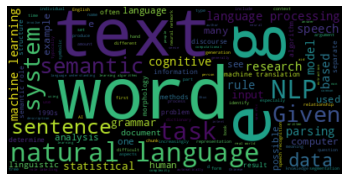

In [21]:
from wordcloud import WordCloud
import wikipedia

# Getting wikipedia contents of "Natural_language_processing"
text = wikipedia.page("Natural_language_processing").content

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

More word cloud examples: [Link](https://amueller.github.io/word_cloud/auto_examples/index.html)

# Saving and Loading Models

Training a model takes time. Once it is trained it is useful to save it. Then when you, or someone else, wants to use it you can just reload it.

And it will be useful to save it during training -- if the training breaks in middle, it will be easy to resume the training process at anytime you want

**Saving a Pytorch model**

In [ ]:
# First, let's train a simple model that takes a number as input, applies a linear transformation, and predicts a single number.
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, input):
        output = self.linear(input)
        return output

no_of_epochs = 500
display_interval = 20
learning_rate=0.01

# training data
x_training = np.asarray([[1],[2],[5],[8],[9],[12],[14],[16],[18],[20]])
y_training = np.asarray([100,200,501,780,901,1201,1399,1598,1800,2000])

x_data_torch = torch.from_numpy(x_training).float()
y_data_torch = torch.from_numpy(y_training).float() 

model = TheModelClass()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(no_of_epochs):

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(x_data_torch)
    loss = torch.sum(torch.pow(outputs-y_data_torch.view(-1,1),2))/(2*x_training.shape[0])
    loss.backward()
    optimizer.step()

    if epoch%display_interval == display_interval-1:
        print('Epoch: %d, loss: %.3f' %(epoch + 1, loss.item() ))

Epoch: 20, loss: 27.755
Epoch: 40, loss: 26.814
Epoch: 60, loss: 25.967
Epoch: 80, loss: 25.204
Epoch: 100, loss: 24.516
Epoch: 120, loss: 23.897
Epoch: 140, loss: 23.340
Epoch: 160, loss: 22.837
Epoch: 180, loss: 22.385
Epoch: 200, loss: 21.978
Epoch: 220, loss: 21.611
Epoch: 240, loss: 21.281
Epoch: 260, loss: 20.983
Epoch: 280, loss: 20.715
Epoch: 300, loss: 20.474
Epoch: 320, loss: 20.256
Epoch: 340, loss: 20.060
Epoch: 360, loss: 19.884
Epoch: 380, loss: 19.725
Epoch: 400, loss: 19.582
Epoch: 420, loss: 19.453
Epoch: 440, loss: 19.337
Epoch: 460, loss: 19.233
Epoch: 480, loss: 19.139
Epoch: 500, loss: 19.054


In [ ]:
# Now we save the trained model to the file named 'example-filename.pt'
file_dir = '/content/MyDrive/monicalong/NLP_5046/example-filename.pt'
torch.save(model, 'example-filename.pt')
torch.save(model,file_dir)

In [33]:
# First, let's train a simple model that takes a number as input, applies a linear transformation, and predicts a single number.
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, input):
        output = self.linear(input)
        return output

no_of_epochs = 500
display_interval = 20
learning_rate=0.01

# training data
x_training = np.asarray([[1],[2],[5],[8],[9],[12],[14],[16],[18],[20]])
y_training = np.asarray([100,200,501,780,901,1201,1399,1598,1800,2000])

x_data_torch = torch.from_numpy(x_training).float()
y_data_torch = torch.from_numpy(y_training).float() 

model = TheModelClass()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(no_of_epochs):

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(x_data_torch)
    loss = torch.sum(torch.pow(outputs-y_data_torch.view(-1,1),2))/(2*x_training.shape[0])
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        torch.save(
            { 'model_state_dict': model.state_dict(),
             'epoch': epoch}, 
             'example-filename_{}.pt'.format(epoch))
        print('Saved Model at Epoch_{}'.format(epoch))

    if epoch%display_interval == display_interval-1:
        print('Epoch: %d, loss: %.3f' %(epoch + 1, loss.item() ))

Epoch: 20, loss: 30.832
Epoch: 40, loss: 29.585
Epoch: 60, loss: 28.463
Epoch: 80, loss: 27.451
Saved Model at Epoch_99
Epoch: 100, loss: 26.541
Epoch: 120, loss: 25.721
Epoch: 140, loss: 24.982
Epoch: 160, loss: 24.317
Epoch: 180, loss: 23.717
Saved Model at Epoch_199
Epoch: 200, loss: 23.178
Epoch: 220, loss: 22.692
Epoch: 240, loss: 22.254
Epoch: 260, loss: 21.860
Epoch: 280, loss: 21.505
Saved Model at Epoch_299
Epoch: 300, loss: 21.185
Epoch: 320, loss: 20.897
Epoch: 340, loss: 20.637
Epoch: 360, loss: 20.404
Epoch: 380, loss: 20.193
Saved Model at Epoch_399
Epoch: 400, loss: 20.004
Epoch: 420, loss: 19.833
Epoch: 440, loss: 19.679
Epoch: 460, loss: 19.541
Epoch: 480, loss: 19.416
Saved Model at Epoch_499
Epoch: 500, loss: 19.304


**Loading model**

**IMPORTANT NOTE**: Before loading the saved PyTorch model by using *torch.load(model_file_name)*, you have to make sure you have already run the code for defining the model class (e.g. the *TheModelClass* in the above section for this sample code). You can try to restart the runtime and then directly load the model to see the error.

In [ ]:
#  Load the saved model from the .pt file
the_saved_model = torch.load('example-filename.pt')
the_saved_model.eval()

TheModelClass(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Use the loaded model to do prediction
prediction = the_saved_model(x_data_torch).detach().numpy()
for i in range(len(y_training)):
    print('X: %d, Y_true: %d, Y_predict: %.3f'%(x_training[i][0],y_training[i],prediction[i][0]))

X: 1, Y_true: 100, Y_predict: 99.517
X: 2, Y_true: 200, Y_predict: 199.424
X: 5, Y_true: 501, Y_predict: 499.144
X: 8, Y_true: 780, Y_predict: 798.864
X: 9, Y_true: 901, Y_predict: 898.771
X: 12, Y_true: 1201, Y_predict: 1198.490
X: 14, Y_true: 1399, Y_predict: 1398.304
X: 16, Y_true: 1598, Y_predict: 1598.117
X: 18, Y_true: 1800, Y_predict: 1797.930
X: 20, Y_true: 2000, Y_predict: 1997.744


In [35]:
the_saved_model = torch.load('example-filename_99.pt')
print(the_saved_model)
print('-----------------------------------------------------')

{'model_state_dict': OrderedDict([('linear.weight', tensor([[99.5199]])), ('linear.bias', tensor([5.1070]))]), 'epoch': 99}
-----------------------------------------------------


In [36]:
## Resume Training with model stopped after 100-epoch training

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, input):
        output = self.linear(input)
        return output

no_of_epochs = 500
display_interval = 20
learning_rate=0.01

# training data
x_training = np.asarray([[1],[2],[5],[8],[9],[12],[14],[16],[18],[20]])
y_training = np.asarray([100,200,501,780,901,1201,1399,1598,1800,2000])

x_data_torch = torch.from_numpy(x_training).float()
y_data_torch = torch.from_numpy(y_training).float() 

model = TheModelClass()
model.load_state_dict(the_saved_model['model_state_dict'])
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

start_epoch = the_saved_model['epoch']+1

for epoch in range(start_epoch, no_of_epochs):
    start_epoch = epoch
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(x_data_torch)
    loss = torch.sum(torch.pow(outputs-y_data_torch.view(-1,1),2))/(2*x_training.shape[0])
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        torch.save(model, 'example-filename_{}.pt'.format(epoch))
        print('Saved Model at Epoch_{}'.format(epoch))

    if epoch%display_interval == display_interval-1:
        print('Epoch: %d, loss: %.3f' %(epoch + 1, loss.item() ))

Epoch: 120, loss: 25.721
Epoch: 140, loss: 24.982
Epoch: 160, loss: 24.317
Epoch: 180, loss: 23.717
Saved Model at Epoch_199
Epoch: 200, loss: 23.178
Epoch: 220, loss: 22.692
Epoch: 240, loss: 22.254
Epoch: 260, loss: 21.860
Epoch: 280, loss: 21.505
Saved Model at Epoch_299
Epoch: 300, loss: 21.185
Epoch: 320, loss: 20.897
Epoch: 340, loss: 20.637
Epoch: 360, loss: 20.404
Epoch: 380, loss: 20.193
Saved Model at Epoch_399
Epoch: 400, loss: 20.004
Epoch: 420, loss: 19.833
Epoch: 440, loss: 19.679
Epoch: 460, loss: 19.541
Epoch: 480, loss: 19.416
Saved Model at Epoch_499
Epoch: 500, loss: 19.304


**How to Save (Upload) the model to your Google Drive**

If you are using Colab, then once the session disconnects in Colab, all the files will be lost. Don't worry, we can save our model file so that we can download and and use it across sessions. 

There are various ways to save files. One option is to download them to your local computer. Another is to upload the files to Google Drive.

[This tutorial](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH) will guide you how to save the files on your Google Drive.

1.   Mounting Google Drive locally
2.   Create a new Drive file

And we've already experienced multiple times for downloading the files from Google Drive (Refer to the Download Dataset section in earlier labs).

# Bi-LSTM with Hidden State Extraction

The folllowing image represents a Bi-LSTM for an N to 1 task. In an N to 1 task, it is usually required to extract the last hidden states of the forward LSTM and the backward LSTM and combine (**concatenate**) them. (For more info, see the lecture 5 recording! We also practised this in Lab 5  with Bi-RNN.)

Bi-LSTM: Bidirectional LSTM, which means the signal propagates backward as well as forward in time.


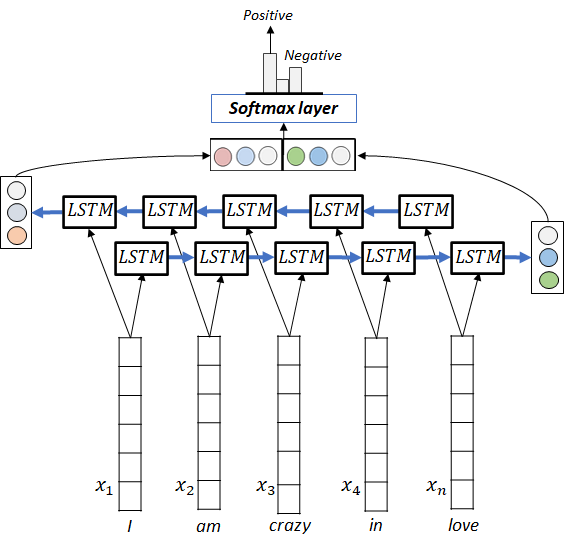




## nn.Embedding
In the Lab 5 Section *Text Classification using Bi-RNN*, we provide the embeddings for each token in each sentence (Check Lab 5 Extension). These are constructed by the pre-trained word embedding model. For example, if the sequence length of the corpus is 8 (think about why we want a uniform sequence length for the whole dataset), the embedding for the sentence "i am crazy in love" should be:
- $[W_{i}, W_{am}, W_{crazy}，W_{in}, W_{love}, W_{[PAD]}, W_{[PAD]}, W_{[PAD]}]$  (if you choose post-padding)

 or

- $[W_{[PAD]}, W_{[PAD]},W_{[PAD]}, W_{i}, W_{am}, W_{crazy}，W_{in}, W_{love}]$ (if you choose pre-padding).

Therefore, after getting the embedding of each sentence, you will get a tensor with the shape of (train_size, seq_length, emb_dimension). However, if these three values (train_size, seq_length, emb_dimension) are too large, you might get an Out-Of-Memory(OOM) problem due to limited CPU/GPU.

One solution is to use **[nn.Embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)** from PyTorch as a lookup table to get the embedding for each token/word during the training process instead of generating them all beforehand.




### Create the lookup table for the vocabulary using pretrained word embeddings

First, we will create a lookup table for our vocabulary, which will be used later to initialize the nn.Embedding (See the follow-up Modeling and Training section).  We will use two pre-trained embeddings and concatenate them in the lookup table so that we can use the concatenated embeddings to represent each word in the sentence. 

In [ ]:
# Let's create some toy data for sentiment analysis
# We will just use all the data to focus on the training only
sentences = [['i','like','that'],
             ['i','love','it'],
             ['i','hate','that'],
             ['i','do','not','like','it']]
labels = ["Positive","Positive","Negative","Negative"]

In [ ]:
# Get the vocabulary list from the training data for creating the lookup table later
# In practice, we only use the vocabulary from training data
word_set = set() 
for sent in sentences:
    for word in sent:
        word_set.add(word)

# Normally we add the special tokens for representing the padding and unknown words separately
# Sometimes we can also use same token to present padding and unknown words if we don't have to differentiate them
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 

# Although in some python versions, converting a set to list will return a ordered result, 
# It is still highly recommended that you sort this list to ensure the reproducibility of your code.
word_list.sort()
print(word_list) ## that is your vocabulary 

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1
print(word_index) ## that is your vocabulary, each word having an unique id

['[PAD]', '[UNKNOWN]', 'do', 'hate', 'i', 'it', 'like', 'love', 'not', 'that']
{'[PAD]': 0, '[UNKNOWN]': 1, 'do': 2, 'hate': 3, 'i': 4, 'it': 5, 'like': 6, 'love': 7, 'not': 8, 'that': 9}


In [ ]:
# This cell may take a few minutes to run

# Download the first Pre-trained Embedding
import gensim.downloader as api
word_emb_model = api.load("glove-twitter-25")

# Create the Embedding lookup table for the first pre-trained embedding
import numpy as np
emb_dim = word_emb_model.vector_size

emb_table = []
## for words in your vocabulary, if the word_i is in the pretrained embedding model, append the pretrained embedding for the word_i in the embedding lookup table (emb_table)
## if not (i.e., the embedding not in the pretrained model - e.g., [PAD] and [UNKNOWN]), making a all-zero vector to representing these situations 
for i, word in enumerate(word_list):
    if word in word_emb_model:
        emb_table.append(word_emb_model[word])
    else:
        # The pretrained glove twitter does not contain the embeddings for the [PAD] and [UNKNOWN] tokens we defined
        # Here, we just use all 0 for both [PAD] and [UNKNOWN] tokens for simplicity
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
    
# print(emb_table)

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
# This cell may take a few minutes to run

# Download another pre-trained word embedding
word_emb_model2 = api.load("glove-twitter-50") 

emb_dim = word_emb_model.vector_size+word_emb_model2.vector_size

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model:
        emb_table.append(np.concatenate((word_emb_model[word],word_emb_model2[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

[==================================================] 100.0% 199.5/199.5MB downloaded


### Input preparation and setup

In [ ]:
# Convert the sentences to the word index that aligns with the lookup table
len_list = [len(s) for s in sentences]
seq_length = max(len_list) ##

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        ## i.e., dealing with unknown words
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
            ## i.e., the representation of each sentence will be in the same shape/len
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded = encode_and_add_padding(sentences, seq_length, word_index)
print(sent_encoded)

[[4, 6, 9, 0, 0], [4, 7, 5, 0, 0], [4, 3, 9, 0, 0], [4, 2, 8, 6, 5]]


In [ ]:
# LabelEncoder can help us encode target labels with a value between 0 and n_classes-1.
# Details can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder

lEnc = LabelEncoder()
lEnc.fit(labels)
label_encoded= lEnc.transform(labels)

print(label_encoded)
## we only have two labels -- positive and negative

[1 1 0 0]


In [ ]:
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)

unique_labels = np.unique(labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.01
total_epoch = 10

10


### Modeling and Training

Now, we can initialize the nn.Embedding using the lookup table we created above.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## pre-constructed 
# vocab_size = len(word_list)
# emb_dim = word_emb_model.vector_size+word_emb_model2.vector_size

# Define the model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created 
        ## nn.Embedding is often used to store word embeddings and retrieve them using indices. 
        ## The input to the module is a list of indices, and the output is the corresponding word embeddings.
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

for epoch in range(total_epoch):  
    
    # Set the flag to training
    model.train()
    
    # forward + backward + optimize
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, targe_torch)
    loss.backward()
    optimizer.step()
    
    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

    print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')




Epoch: 1, loss: 0.68059, train_acc: 0.50
Epoch: 2, loss: 0.57165, train_acc: 0.75
Epoch: 3, loss: 0.47442, train_acc: 0.75
Epoch: 4, loss: 0.37094, train_acc: 1.00
Epoch: 5, loss: 0.26576, train_acc: 1.00
Epoch: 6, loss: 0.16815, train_acc: 1.00
Epoch: 7, loss: 0.09252, train_acc: 1.00
Epoch: 8, loss: 0.04219, train_acc: 1.00
Epoch: 9, loss: 0.01757, train_acc: 1.00
Epoch: 10, loss: 0.00738, train_acc: 1.00
Finished Training


In [ ]:
# You can check whether model.emb.weight changed
# You can also try to comment self.emb.weight.requires_grad = False and then train the model and check again
# print(model.emb.weight)

#Build a simple user interface

When we have a well trained model ready to be used by others, it would be wonderful to have a friendly user interface instead of asking users to enter the input in the code fields. In colab, we can simply build up a user interface via the built-in ***Form Fields*** (We experienced  text fields in Lab1 2 and different types of fieds in Lab 3)

In this section, we will focus on practising how to build a simple user friendly interface for retrieving the most similar word for the query word from a trained Word2Vec model. Let's just use the Gensim Word2Vec CBOW model from Lab2.

-------
https://colab.research.google.com/notebooks/forms.ipynb

## Train word embeddings via Gensim Word2Vec model

In [ ]:
## Download the corpus - TED scripts

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '17tGzZyLbz1W3xedRhhl-j5i1ndgaM_yM'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ted_en-20160408.xml')  

To download the file directly without using Google Drive, see [this link](https://drive.google.com/file/d/17tGzZyLbz1W3xedRhhl-j5i1ndgaM_yM/view?usp=sharing)

In [ ]:
## Process and prepare the data for word2vec model training

import re
from lxml import etree 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec

targetXML=open('ted_en-20160408.xml', 'r')

# Getting contents of <content> tag from the xml file
target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# Removing "Sound-effect labels" using regular expression (regex) (i.e. (Audio), (Laughter))
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# Tokenising the sentence to process it by using NLTK library
sent_text=sent_tokenize(content_text)

# Removing punctuation and changing all characters to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# Tokenising each sentence to process individual word
sentences=[]
sentences=[word_tokenize(sentence) for sentence in normalized_text]

# Prints only 10 (tokenised) sentences
print(sentences[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing'], ['consider', 'facit'], ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'], ['facit', 'was', 'a', 'fantastic', 'company'], ['they', 'were', 'born', 'deep', 'in', 'the', 'swedish', 'forest', 'and', 'they', 'made', 'the', 'best', 'mechanical', 'calculators', 'in', 'the', 'world'], ['everybody', 'used', 'them'], ['and', 'what', 'did', 'facit', 'do', 'when', 'the', 'electronic', 'calculator', 'came', 'along'], ['they', 'continued', 'doing', 'exactly', 'the', 'same']]


In [ ]:
# Train the Word2Vec embedding model - CBOW
wv_cbow_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4, sg=0)

## Simple user interface for the Gensim Word2Vec model

In [ ]:
#@title Synonym Dictionary
#@markdown Please input the word you want to find the synonym for in the following field:

#@markdown ---
Word = 'fortunate'  #@param {type: "string"}

#@markdown ---

# Find the most similar word by using the word2vec gensim CBOW model we jsut trained above
try:
    similar_words=wv_cbow_model.wv.most_similar(Word)
    print("The synonym for "+Word+" is: "+similar_words[0][0])
except:
    print("Unfortunately, the word you entered is not in our dictionary. Please try another one and good luck!")

The synonym for fortunate is: lucky


In [ ]:
#@title TITLE

#@markdown NLP

# Exercise

## E1. Explaining design motivation

Briefly explain why we use a sigmoid in the forget gate of an LSTM. Include an example.

Your answer:

## E2. Preprocessing and Model Saving
In this exercise, we will implement a simple sentiment analysis model on a large movie review dataset named IMDB. As is illustrated in the figure below from the Lecture 5 slides, we normally use the last hidden state from a single-directional RNN/LSTM for final classification over a sequence.

You are required to preprocess the train and test data, apply different pre-trained embeddings, save and load your trained model. You need to complete the section we tagged as **'[complete this section][TO DO]'. PLEASE!!! PLEASE!!!! READ THE COMMENT IN EACH CODE BLOCK**

**Note**: We will NOT mark your exercise based on the test set performance. We will only check whether the preprocessing part, embedding part and model saving and loading part are correct.

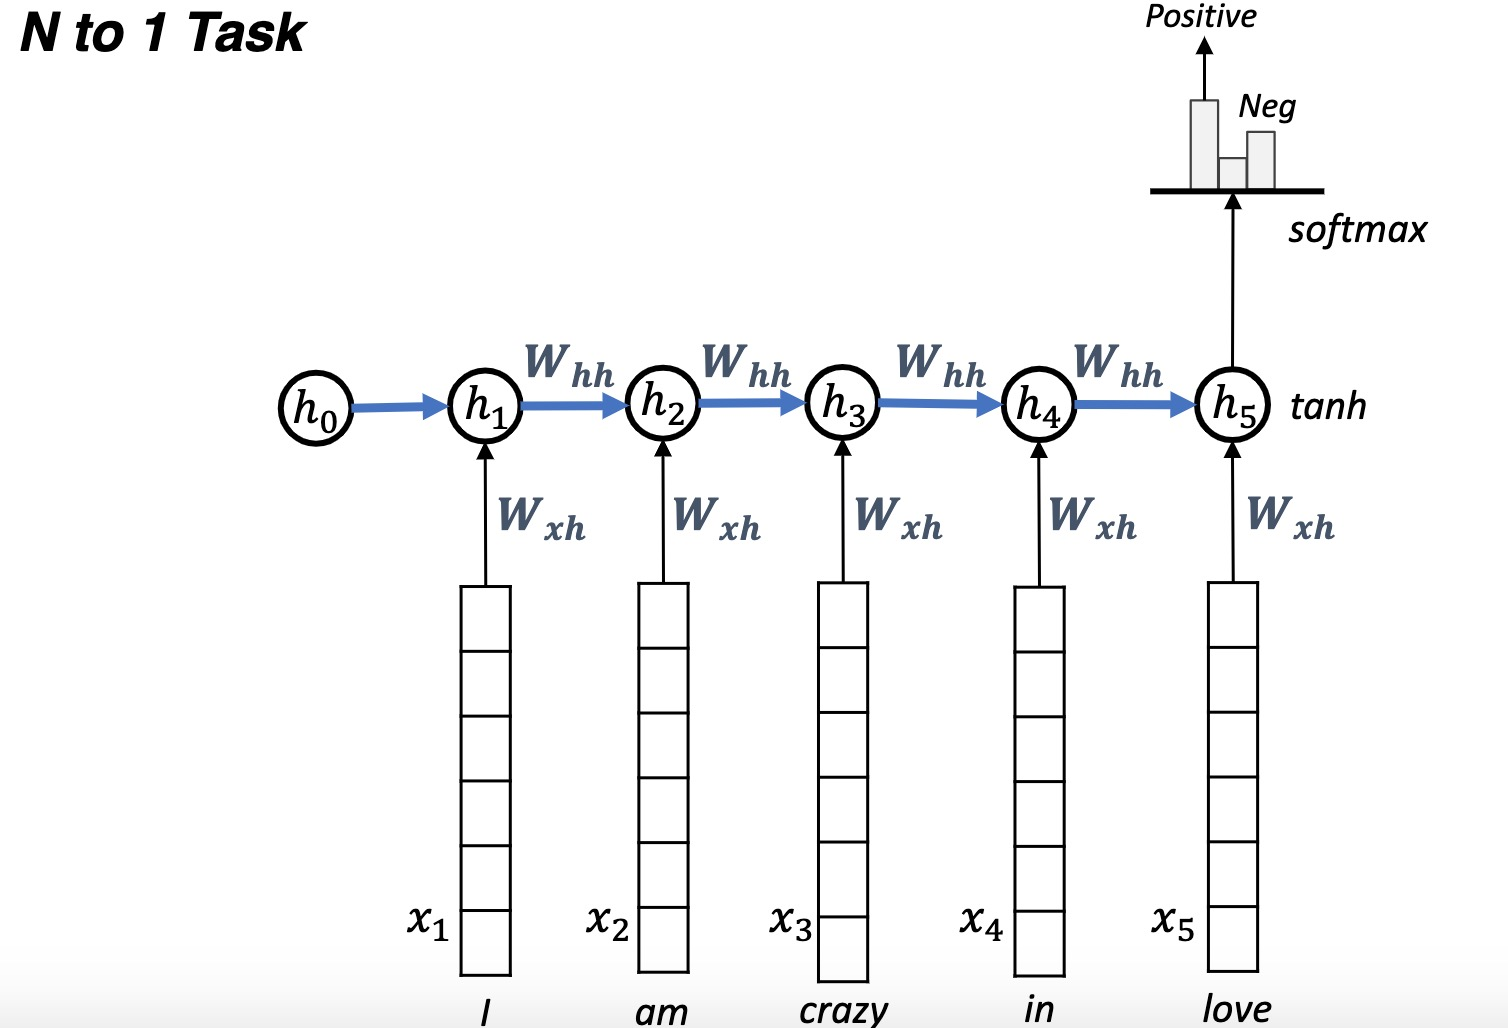





In [ ]:
import torch
# You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Download Dataset

Use the code below to download the dataset. Or download it directly from [here](https://drive.google.com/file/d/1suFDMHMx1RaWTRtLVhlHH_UacS8oyFPY/view?usp=sharing).

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1suFDMHMx1RaWTRtLVhlHH_UacS8oyFPY'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('imdb.csv')

import pandas as pd
df = pd.read_csv("imdb.csv")
df_pick = df.sample(4000,random_state=24)

raw_text = df_pick["review"].tolist()
raw_label = df_pick["sentiment"].tolist()

from sklearn.model_selection import train_test_split
text_train,text_test,label_train,label_test = train_test_split(raw_text,raw_label,test_size=0.25,random_state=42)

### Preprocessing [Complete this section]

####**Case Folding**

In [ ]:
text_train = [s.lower() for s in text_train]
text_test = [s.lower() for s in text_test]

####**Remove punctuations [Please complete this section]**

In [ ]:
import re
def remove_punctuation_re(x):
    # [TODO] Please complete this function
    return x
    
text_train = [remove_punctuation_re(s) for s in text_train]
text_test = [remove_punctuation_re(s) for s in text_test]

####**Tokenization [Please complete this section]**

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# [TODO] Please complete the following code
text_train = 
text_test = 

####**Remove stopwords [Please complete this section]**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words()

text_train_ns=[]
for tokens in text_train:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_train_ns.append(filtered_sentence)

text_test_ns=[]
for tokens in text_test:
    # [TODO] Please complete this code body 

####**Lemmatisation [Please complete this section]**

In [ ]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

text_train_le = []
for tokens in text_train_ns:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_train_le.append(lemma_sentence)

text_test_le = []
for tokens in text_test_ns:
    # [TODO] Please complete this code body


####**Label Encoding [Please complete this section]**

In [ ]:
import numpy as np

from sklearn.preprocessing import LabelEncoder

unique_labels = np.unique(label_train)

lEnc = LabelEncoder()
# [TODO] Please encode the labels (Do NOT add new lines of code in this section)
# Hint: Try to understand the difference between fit_transform and transform
label_train_encoded = 
label_test_encoded = 

n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))

### Embeddings [Complete this section]

####**Get Word List**

In [ ]:
word_set = set() 
for sent in text_train_le:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 
word_list.sort()
print(word_list)

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1
print(word_index)

#### **Download Pre-trained Embeddings [Please complete this section]**

You can find the details from https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api
# [TODO] Please load the pretrained embedding
word_emb_model = api.load("xxx") # NOTE: Download an embedding other than glove-twitter-25

#### **Embedding lookup table**

In [ ]:
# Get the Embedding lookup table
import numpy as np
emb_dim = word_emb_model.vector_size

emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model:
        emb_table.append(word_emb_model[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

#### **Padding and encoding [Please complete this section]**

In [ ]:
# The sequence length is pre-defined, you can't change this value for this exercise
seq_length = 16

# [TODO] Please Complete the function below
# Hint: You should pay attention to: (1) if the sentence length > seq_length (2) if the word not in word_index dictionary
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []

    return sent_encoded

train_pad_encoded = encode_and_add_padding(text_train_le, seq_length, word_index )
test_pad_encoded = encode_and_add_padding(text_test_le, seq_length, word_index )

### Model [Complete this section]


In [ ]:
vocab_size = len(word_list)
total_epoch = 100
learning_rate = 0.01

In [ ]:
import torch
# You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        # [TODO] Define a Single Directional LSTM Layer, hidden dimenstion is 50

        self.lstm = 
        # [TODO] Define the Linear Layer
        
        self.linear = 

    def forward(self, x):
        # [TODO] Define your forward function


model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

input_torch = torch.from_numpy(np.array(train_pad_encoded)).to(device)
target_torch = torch.from_numpy(np.array(label_train_encoded)).view(-1).to(device)


for epoch in range(total_epoch):  
    
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')


### Save and Load the model [Complete this section]

**Save the model [Complete this part]**

In [ ]:
# [TODO] please save your trained model, which then can be loaded by the follow-up code cell



**Load the model**

In [ ]:
# Load the model you just saved in above code cell
model2 = torch.load('lab5.pt')
model2.eval()

### Testing

In [ ]:
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)

outputs = model2(input_torch) 
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
print(classification_report(label_test_encoded,predicted.cpu().numpy()))

Sample output for the above code cell (Only for Format reference). **Note**: Please make sure you have the output saved in your log in your submission file.




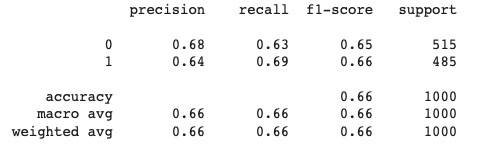